# Some quantum music

We will be using maths and Midi files, so let's start with some imports.

In [1]:
import numpy as np
from midiutil import MIDIFile

We'll be manipulating the music in the Midi files using some quantum software. For that we'll be using [Quantum Blur](https://github.com/qiskit-community/QuantumBlur/blob/master/README.md) (which has Qiskit under the hood).

In [2]:
import quantumblur as qb

The process will be to start with an initial piece of music and then modify it. We'll do this using a structure such as the following (which represents 'Twinkle twinkle little star').

In [3]:
score = [{'note': 'C', 'octave': 0, 'bar': 0, 'beat': 0, 'volume': 100}, {'note': 'C', 'octave': 0, 'bar': 0, 'beat': 1, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 0, 'beat': 2, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 0, 'beat': 3, 'volume': 100}, {'note': 'A', 'octave': 0, 'bar': 1, 'beat': 0, 'volume': 100}, {'note': 'A', 'octave': 0, 'bar': 1, 'beat': 1, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 1, 'beat': 2, 'volume': 100}, {'note': 'F', 'octave': 0, 'bar': 2, 'beat': 0, 'volume': 100}, {'note': 'F', 'octave': 0, 'bar': 2, 'beat': 1, 'volume': 100}, {'note': 'E', 'octave': 0, 'bar': 2, 'beat': 2, 'volume': 100}, {'note': 'E', 'octave': 0, 'bar': 2, 'beat': 3, 'volume': 100}, {'note': 'D', 'octave': 0, 'bar': 3, 'beat': 0, 'volume': 100}, {'note': 'D', 'octave': 0, 'bar': 3, 'beat': 1, 'volume': 100}, {'note': 'C', 'octave': 0, 'bar': 3, 'beat': 2, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 4, 'beat': 0, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 4, 'beat': 1, 'volume': 100}, {'note': 'F', 'octave': 0, 'bar': 4, 'beat': 2, 'volume': 100}, {'note': 'F', 'octave': 0, 'bar': 4, 'beat': 3, 'volume': 100}, {'note': 'E', 'octave': 0, 'bar': 5, 'beat': 0, 'volume': 100}, {'note': 'E', 'octave': 0, 'bar': 5, 'beat': 1, 'volume': 100}, {'note': 'D', 'octave': 0, 'bar': 5, 'beat': 2, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 6, 'beat': 0, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 6, 'beat': 1, 'volume': 100}, {'note': 'F', 'octave': 0, 'bar': 6, 'beat': 2, 'volume': 100}, {'note': 'F', 'octave': 0, 'bar': 6, 'beat': 3, 'volume': 100}, {'note': 'E', 'octave': 0, 'bar': 7, 'beat': 0, 'volume': 100}, {'note': 'E', 'octave': 0, 'bar': 7, 'beat': 1, 'volume': 100}, {'note': 'D', 'octave': 0, 'bar': 7, 'beat': 2, 'volume': 100}, {'note': 'C', 'octave': 0, 'bar': 8, 'beat': 0, 'volume': 100}, {'note': 'C', 'octave': 0, 'bar': 8, 'beat': 1, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 8, 'beat': 2, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 8, 'beat': 3, 'volume': 100}, {'note': 'A', 'octave': 0, 'bar': 9, 'beat': 0, 'volume': 100}, {'note': 'A', 'octave': 0, 'bar': 9, 'beat': 1, 'volume': 100}, {'note': 'G', 'octave': 0, 'bar': 9, 'beat': 2, 'volume': 100}, {'note': 'F', 'octave': 0, 'bar': 10, 'beat': 0, 'volume': 100}, {'note': 'F', 'octave': 0, 'bar': 10, 'beat': 1, 'volume': 100}, {'note': 'E', 'octave': 0, 'bar': 10, 'beat': 2, 'volume': 100}, {'note': 'E', 'octave': 0, 'bar': 10, 'beat': 3, 'volume': 100}, {'note': 'D', 'octave': 0, 'bar': 11, 'beat': 0, 'volume': 100}, {'note': 'D', 'octave': 0, 'bar': 11, 'beat': 1, 'volume': 100}, {'note': 'C', 'octave': 0, 'bar': 11, 'beat': 2, 'volume': 100}]


To play the music in these 'scores', we will turn it into Midi files. The function below does this.

In [4]:
midi_C = 36
beats_per_bar = 4
note_ref = {'C':0,'C#':1,'D':2,'D#':3,'E':4,'F':5,'F#':6,'G':7,'G#':8,'A':9,'A#':10,'B':11}


def score2midi(score,filename):

    track = 0
    channel = 0
    tempo = 60

    MyMIDI = MIDIFile(1)
    MyMIDI.addTempo(track, 0, tempo)
    MyMIDI.addProgramChange(0,0,0,1)

    for note in score:
        
        n = note_ref[note['note']]
        beat = note['beat']
        octave = note['octave']
        bar = note['bar']

        degree = n + octave*12 + midi_C
        time = beat + beats_per_bar*bar
        duration = 1
        volume = note['volume']
        MyMIDI.addNote(track, channel, degree, time, duration, volume)

    with open(filename, 'wb') as output_file:
        MyMIDI.writeFile(output_file)

To see what the music looks like, we can turn it into an image.

First we turn it into what we call a heightmap, which assigns a single value to a set if coordinates. This value could be interpreted as either a height (hence the name) or brightness (for a monochrome image).

The coordinates we will use for our music will represent the semitone for the note (on the y axis) and beat at which it occurs (on the x axis).

To make the music easier to encode in a quantum computer, we'll also rescale from the usual 12 semitones per octave to a power of 2. When converting from the heightmap back to a score, we'll rescale it back again.

The following function turns scores into heightmaps.

In [5]:
semis_per_octave = 16

def score2height(score):
    
    h = {}
    
    t_max = 0
    for note in score:
        
        n = int( np.round(note_ref[note['note']] * semis_per_octave/12) + semis_per_octave*note['octave'] )
        t = note['beat'] + beats_per_bar*note['bar']
        
        if (t,n) not in h:
            h[t,n] = note['volume']
        else:
            h[t,n] += note['volume']

        t_max = max(t,t_max)
       
    h_max = max(h.values())
    for t,n in h:
        h[t,n] /= h_max

    # make sure there is something non-zero (though very small if it should be zero)
    # is in the bottom right corner so that qb displays the full image
    t = int(2**np.ceil(np.log2(t_max-1))) - 1
    n = semis_per_octave - 1
    if (t,n) not in h:
        h[t,n] = 1e-9
    
    return h

The next one turns heightmaps into images that can be easily rendered here in a Jupyter notebook.

In [6]:
def score2image(score,scale=10):
    
    height = score2height(score)
    
    img = qb.height2image(height)
    img = img.resize((img.size[0]*10,img.size[1]*10),0)
    
    return img

Here's our score as an image.

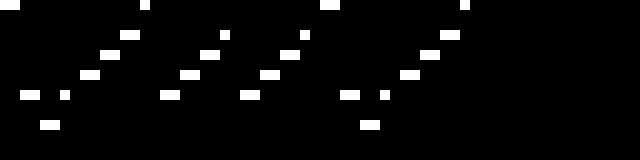

In [7]:
score2image(score)

This has the lowest notes at the top, so you can flip it to get the more standard convention of the highest at the top.

/var/folders/k_/v_j5rlt17y57y1twq31yq_040000gn/T/ipykernel_80036/1715738746.py:2: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  score2image(score).transpose(PIL.Image.FLIP_TOP_BOTTOM)


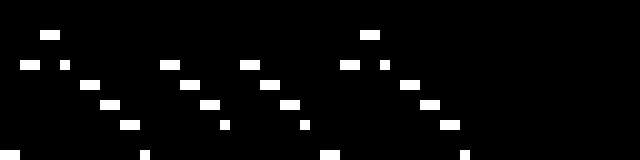

In [8]:
import PIL
score2image(score).transpose(PIL.Image.FLIP_TOP_BOTTOM)

The final step is to turn heightmaps back into scores.

This has an option to call the function with `max_only=True`. In the case that there are two notes played at the same time, this removes all but those with maximum value, and collects all the volume of the rejected notes into the ones that remain.

In [9]:
def height2score(height,max_only=False):
    
    score = []
    
    max_h = max(height.values())
    
    notes4beats = [[] for _ in range(10000) ]
    for (t,n) in height:
        
        note = {}
        
        note['beat'] = t%beats_per_bar
        note['bar'] = int((t-note['beat'])/beats_per_bar)
        
        n0 = np.round((n%semis_per_octave)*12/semis_per_octave)
        note['note'] = list(note_ref.keys())[list(note_ref.values()).index(int(n0))]
        note['octave'] = int((n - n%semis_per_octave)/semis_per_octave)
        
        note['volume'] = int(100*height[t,n]/max_h)
        
        notes4beats[t].append(note.copy())
        
                
    for t,notes in enumerate(notes4beats):

        if max_only:
            
            max_vol = 0
            total_vol = 0
            for note in notes:
                max_vol = max( note['volume'], max_vol )
                total_vol += note['volume']
                
            for note in notes:
                if note['volume']==max_vol:
                    note['volume'] = min(total_vol,100)
                    score.append(note)
            
        else:
            for note in notes:
                score.append(note)
        
    return score

Now we can actually do something!

Quantum Blur has been designed to encode heightmaps as quantum circuits, and turn quantum circuits back to heightmaps. This allows the heightmaps to be manipulated by changing the circuit.

First, let's just turn the score into a circuit and back again, to see that it comes back in one piece.

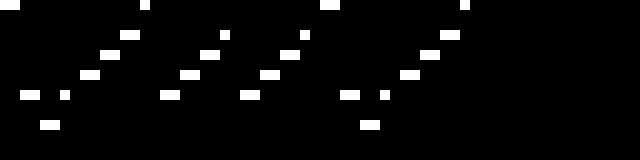

In [10]:
height = score2height(score)
qc = qb.height2circuit(height)
new_height = qb.circuit2height(qc)

new_score = height2score(new_height,max_only=False)
score2image(new_score)

Now let's add some `rx` rotations on all qubits, which is the simplest way to manipulate the height map.

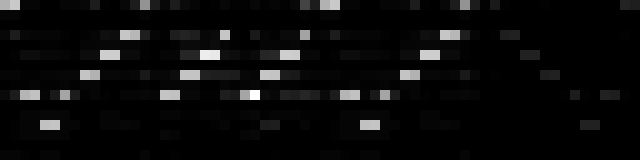

In [11]:
theta = np.pi/8

height = score2height(score)
qc = qb.height2circuit(height)
qc.rx(theta,range(qc.num_qubits))
new_height = qb.circuit2height(qc)

new_score = height2score(new_height,max_only=False)
score2image(new_score)

Here the angle of rotation was quite small, so it didn't change the score much. In fact, with `max_only=True` we find that it hardly changed at all.

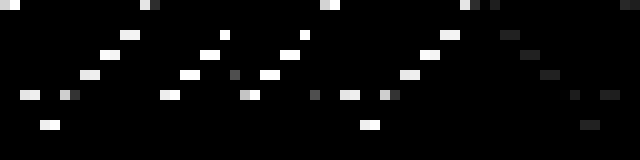

In [12]:
new_score = height2score(new_height,max_only=True)
score2image(new_score)

The effect is more pronounced with a larger angle.

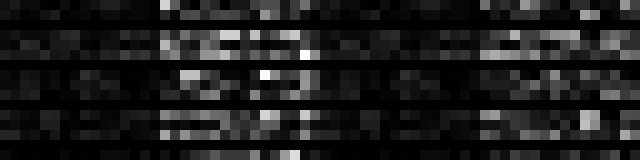

In [13]:
theta = np.pi*0.41

height = score2height(score)
qc = qb.height2circuit(height)
qc.rx(theta,range(qc.num_qubits))
new_height = qb.circuit2height(qc)

new_score = height2score(new_height,max_only=False)
score2image(new_score)

And still results in something very different when we take `max_only=True`.

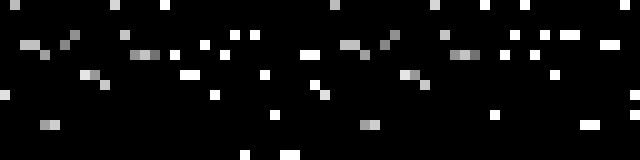

In [14]:
new_score = height2score(new_height,max_only=True)
score2image(new_score)

When we convert back to a score, and then to a midi file, we can listen to what results. It turns out to be very different to what we started with, but still arguably music.

In [15]:
score2midi(new_score,'music.mid')

You can find the resulting midi file in the same folder as this notebook. Or you can listen to [this version](https://soundcloud.com/james-wootton-348392631/quantum-twinkle-2021) that has helpfully been uploaded to SoundCloud.